<a href="https://colab.research.google.com/github/mahroosanwar/Image-Classification/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.75 s (started: 2021-04-30 17:04:51 +00:00)


In [79]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
time: 3.44 ms (started: 2021-04-30 17:04:54 +00:00)


In [80]:
#preprocessing

import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize


time: 2.59 ms (started: 2021-04-30 17:04:54 +00:00)


In [81]:
target = []
images = []
flat_data = []

DATADIR = "/content/drive/MyDrive/Python/Minor Project"
CATEGORIES = ['bike images','car images','eye images']


for category in CATEGORIES:
 class_num = CATEGORIES.index(category)   #Label Encoding the Values
 path = os.path.join(DATADIR,category)  #create path to use all the images
 for img in os.listdir(path):
   img_array = imread(os.path.join(path,img))
   img_resized = resize(img_array,(150,150,3))
   flat_data.append(img_resized.flatten())
   images.append(img_resized)
   target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)


time: 1min 19s (started: 2021-04-30 17:04:54 +00:00)


In [82]:
 from sklearn.model_selection import train_test_split
 x_train,x_test,y_train,y_test = train_test_split(flat_data,target,
                                    test_size=0.3,random_state=109)

time: 27.8 ms (started: 2021-04-30 17:06:13 +00:00)


In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 5min 56s (started: 2021-04-30 17:06:13 +00:00)


In [84]:
y_pred = clf.predict(x_test)
y_pred

array([0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 1, 0, 0, 1, 0, 2,
       0, 0, 0, 2, 0, 0, 2, 2, 1, 2, 0, 1, 0, 0, 2, 2, 1, 1, 2, 1, 1, 1,
       0, 1, 1])

time: 532 ms (started: 2021-04-30 17:12:10 +00:00)


In [85]:
y_test

array([1, 2, 2, 2, 0, 1, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 2,
       0, 0, 1, 2, 0, 0, 2, 2, 0, 2, 1, 0, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1,
       2, 1, 1])

time: 4.94 ms (started: 2021-04-30 17:12:11 +00:00)


In [86]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 1.27 ms (started: 2021-04-30 17:12:11 +00:00)


In [87]:
accuracy_score(y_pred,y_test)

0.6808510638297872

time: 7.59 ms (started: 2021-04-30 17:12:11 +00:00)


In [88]:
confusion_matrix(y_pred,y_test)

array([[13,  6,  3],
       [ 3,  9,  1],
       [ 1,  1, 10]])

time: 6.67 ms (started: 2021-04-30 17:12:11 +00:00)


In [89]:
#save the model using Pickle Library

import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 86.8 ms (started: 2021-04-30 17:12:11 +00:00)


In [90]:
model = pickle.load(open('img_model.p','rb'))

time: 33.2 ms (started: 2021-04-30 17:12:11 +00:00)


Enter Your URLhttps://m.media-amazon.com/images/I/617OW8TPOWL._AC_SS450_.jpg
(450, 450, 3)
PREDICTED OUTPUT: bike images


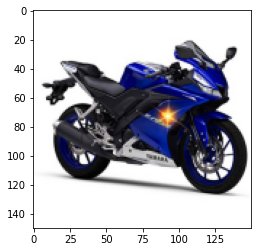

time: 3min 41s (started: 2021-04-30 17:12:11 +00:00)


In [91]:
#Predict for a new Image
flat_data = []
url = input('Enter Your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT: {y_out}')
